In [25]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from os import listdir
from os.path import isfile, join
import os

In [30]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025summer/tuktuk_a12_tl/filtered/freeze/"


In [31]:
tuktuk_files = [f for f in sorted(listdir(dir)) if isfile(join(dir, f))]
#l=listdir(dir)
#times=[x.split('.')[0] for x in l]

timeposs=['22/08/2024 08:29',
          '26/08/2024 08:29',
          '30/08/2024 08:29',
          '03/09/2024 08:29',
          '07/09/2024 08:29',
          '11/09/2024 08:29',
          '15/09/2024 08:29',
          '19/09/2024 08:29',
          '23/09/2024 08:29',
          '27/09/2024 08:29',
          '01/10/2024 08:29',
          '05/10/2024 08:29',
          '09/10/2024 08:29',
          '13/10/2024 08:29',
          '17/10/2024 08:29',
          '21/10/2024 08:29',
          '25/10/2024 08:29',
          '29/10/2024 08:29',
          '02/11/2024 08:29',
          '06/11/2024 08:29',
          '10/11/2024 08:29',
          '14/11/2024 08:29',
          '18/11/2024 08:29',
          '22/11/2024 08:29',
          '26/11/2024 08:29',
          '30/11/2024 08:29',
          '04/12/2024 08:29',
          '08/12/2024 08:29',
          '12/12/2024 08:29']
tuktuk_data = []

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

In [32]:
for i in tuktuk_files:
    data = ert.load(dir+i)
    tuktuk_data.append(data)


data_topo = pd.read_csv('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025summer/t12_h1_mon_topo.txt', sep='\s+', header=None)

for y in tuktuk_data:
    for i in range(data.sensorCount()):
        x_new = data_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = data_topo[1][i]  # Get y-value from diag1_topo[1]
        y.setSensorPosition(i, [x_new, y_new])

for data in tuktuk_data:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    #data.markInvalid(data['rhoa']<=0)

08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns


08/09/25 - 14:14:31 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
08/09/25 - 14:14:31 - pyGIMLi - INFO - No electrode positions found!
08/09/25 - 14:14:31 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
08/09/25 - 14:14:31 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
08/09/25 - 14:14:31 - pyGIMLi - INFO - No electrode positions found!
08/09/25 - 14:14:31 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
08/09/25 - 14:14:31 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
08/09/25 - 14:14:31 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
08/09/25 - 14:14:31 - pyGIMLi - INFO -

In [88]:
tuktuk_files = [f for f in listdir(dir) if isfile(join(dir, f))]
#l=listdir(dir)
#times=[x.split('.')[0] for x in l]

timeposs=['22/08/2024 08:29',
          '26/08/2024 08:29',
          '30/08/2024 08:29',
          '03/09/2024 08:29',
          '07/09/2024 08:29',
          '11/09/2024 08:29',
          '15/09/2024 08:29',
          '19/09/2024 08:29',
          '23/09/2024 08:29',
          '27/09/2024 08:29',
          '01/10/2024 08:29',
          '05/10/2024 08:29',
          '09/10/2024 08:29',
          '13/10/2024 08:29',
          '17/10/2024 08:29',
          '21/10/2024 08:29',
          '25/10/2024 08:29',
          '29/10/2024 08:29',
          '02/11/2024 08:29',
          '06/11/2024 08:29',
          '10/11/2024 08:29',
          '14/11/2024 08:29',
          '18/11/2024 08:29',
          '22/11/2024 08:29',
          '26/11/2024 08:29',
          '30/11/2024 08:29',
          '04/12/2024 08:29',
          '08/12/2024 08:29',
          '12/12/2024 08:29',
          '31/03/2025 08:29',
          '22/03/2025 08:29',
          '26/03/2025 08:29',
          '30/03/2025 08:29',
          #'03/04/2025 08:29',
          '07/04/2025 08:29',
          '11/04/2025 08:29',
          '15/04/2025 08:29',
          '19/04/2025 08:29',
          '23/04/2025 08:29',
          '27/04/2025 08:29',
          '01/05/2025 08:29',
          '05/05/2025 08:29',
          '09/05/2025 08:29',
          '13/05/2025 08:29',
          '17/05/2025 08:29',
          '21/05/2025 08:29',
          '25/05/2025 08:29',
          '29/05/2025 08:29',
          '02/06/2025 08:29',
          '06/06/2025 08:29',
          '10/06/2025 08:29',
          '14/06/2025 08:29',
          '18/06/2025 08:29',
          '22/06/2025 08:29',
          '26/06/2025 08:29',
          '30/06/2025 08:29',
          '04/07/2025 08:29']
tuktuk_data = []

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

In [89]:

for i in tuktuk_files:
    data = ert.load(dir+i)
    tuktuk_data.append(data)


data_topo = pd.read_csv('C:/Users/Expedition/Desktop/expedition2025_winter/t12_h1_mon_topo.txt', sep='\s+', header=None)

for y in tuktuk_data:
    for i in range(data.sensorCount()):
        x_new = data_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = data_topo[1][i]  # Get y-value from diag1_topo[1]
        y.setSensorPosition(i, [x_new, y_new])

for data in tuktuk_data:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    #data.markInvalid(data['rhoa']<=0)
    


14/08/25 - 01:59:46 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
14/08/25 - 01:59:46 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
14/08/25 - 01:59:46 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
14/08/25 - 01:59:46 - pyGIMLi - INFO - No electrode positions found!
14/08/25 - 01:59:46 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
14/08/25 - 01:59:46 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
14/08/25 - 01:59:46 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
14/08/25 - 01:59:46 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
14/08/25 - 01:59:46 - pyGIMLi - INFO - No electrode positions found!
14/08/25 - 01:59:46 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
14/08/25 - 01:59:46 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
14/08/25 - 01:59:46 - pyGIMLi - INFO 

In [33]:
plc = mt.createParaMeshPLC(tuktuk_data[0], paraMaxCellSize=5)
mesh = mt.createMesh(plc)

In [34]:
tl = ert.TimelapseERT(tuktuk_data, times=timepos, mesh=mesh)

08/09/25 - 14:14:40 - pyGIMLi - INFO - Found 2 regions.
08/09/25 - 14:14:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


08/09/25 - 14:14:40 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 18): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6914315771103630200


In [35]:
len(timepos)

29

In [36]:
tl

Timelapse ERT data:
Data: Electrodes: 24 data: 126
29 time steps from 2024-08-22 08:29 to 2024-12-12 08:29

In [37]:
tl.fullInversion(lam=20, verbose=True)

08/09/25 - 14:14:45 - pyGIMLi - INFO - Found 2 regions.
08/09/25 - 14:14:45 - pyGIMLi - INFO - Region with smallest marker (1) set to background
08/09/25 - 14:14:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/09/25 - 14:14:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/09/25 - 14:14:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5451 Cells: 10728 Boundaries: 8132
08/09/25 - 14:14:52 - pyGIMLi - INFO - Starting inversion.


2074 model cells
Mesh: Nodes: 5451 Cells: 10728 Boundaries: 8132
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x0000028F21B9DF30>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 95.25/1266
min/max (error): 3%/3%
min/max (start model): 468/468
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1085.41
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   73.64 (dPhi = 92.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.81 (dPhi = 78.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.16 (dPhi = 41.93%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.24 (dPhi = 4.46%) lam: 20.0
---------------------------

60146 [87.2935825992746,...,3804.7114432046833]

In [46]:
tl.invert(lam=20, verbose=True)

08/09/25 - 14:39:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/09/25 - 14:39:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/09/25 - 14:39:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5451 Cells: 10728 Boundaries: 8132
08/09/25 - 14:39:26 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:39:26 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 108/990
min/max (error): 3%/3%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2553.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   37.24 (dPhi = 98.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.11 (dPhi = 55.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.10 (dPhi = 50.57%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

08/09/25 - 14:40:13 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:40:13 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.14 (dPhi = 0.33%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.33 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 107/988
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------


08/09/25 - 14:40:34 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:40:34 - pyGIMLi - INFO - Setting starting model as reference!


inv.iter 0 ... chi² =    2.30
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.99 (dPhi = 46.28%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.99)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 105/973
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    2.74
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.01 (dPhi = 54.64%) lam: 20.0
-----------------------------------------------------

08/09/25 - 14:41:09 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:41:09 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.71 (dPhi = 13.69%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.71)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 105/975
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    2.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.03 (dPhi = 55.51%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:41:53 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:41:53 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.71 (dPhi = 15.52%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.71)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 105/965
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    3.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.02 (dPhi = 63.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:42:37 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:42:37 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.71 (dPhi = 14.70%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.71)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 103/957
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    4.10
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.01 (dPhi = 68.91%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:43:17 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:43:17 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.71 (dPhi = 14.61%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.71)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 103/951
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    4.63
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.02 (dPhi = 71.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:43:54 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:43:54 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.72 (dPhi = 15.02%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 98.53/924
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    8.28
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.00 (dPhi = 84.27%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (1.00)                   #
#############

08/09/25 - 14:44:23 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:44:23 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 97.84/918
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    9.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.00 (dPhi = 85.62%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:45:06 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:45:06 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.74 (dPhi = 13.30%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.74)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 95.25/901
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   12.97
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.01 (dPhi = 89.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:45:41 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:45:41 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.76 (dPhi = 12.42%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.76)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 95.58/900
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   12.46
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:46:07 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:46:07 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.00 (dPhi = 89.39%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (1.00)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 98.31/914
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    8.84
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.01 (dPhi = 85.18%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:46:50 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:46:50 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.72 (dPhi = 14.85%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 99.88/915
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    8.33
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:47:19 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:47:19 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.02 (dPhi = 84.11%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.73 (dPhi = 15.61%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.73)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 101/925
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    6.87
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.01 (dPhi = 81.04%) lam: 20.0
------------------------------------------

08/09/25 - 14:47:47 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:47:47 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.70 (dPhi = 16.96%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.70)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 103/934
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    5.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.03 (dPhi = 76.38%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:48:15 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:48:15 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.69 (dPhi = 19.09%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.69)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 105/942
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    4.90
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.03 (dPhi = 72.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:48:45 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:48:45 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.69 (dPhi = 21.15%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.69)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 107/948
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    4.53
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.03 (dPhi = 70.32%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:49:15 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:49:15 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.67 (dPhi = 23.27%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.67)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 108/956
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    4.29
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:49:48 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:49:48 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.01 (dPhi = 68.68%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.65 (dPhi = 25.84%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.65)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 111/965
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------


08/09/25 - 14:50:23 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:50:23 - pyGIMLi - INFO - Setting starting model as reference!


inv.iter 0 ... chi² =    4.48
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.00 (dPhi = 69.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.65 (dPhi = 27.34%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.65)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 113/974
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    5.29
-----------------------------------------------------

08/09/25 - 14:50:46 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:50:46 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 115/984
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    6.53
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:51:06 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:51:06 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.94 (dPhi = 80.21%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.94)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 117/995
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------


08/09/25 - 14:51:26 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:51:26 - pyGIMLi - INFO - Setting starting model as reference!
08/09/25 - 14:51:47 - pyGIMLi - INFO - Starting inversion.


inv.iter 0 ... chi² =    8.77
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.92 (dPhi = 85.68%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.92)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 121/1008
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   12.82
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.90 (dPhi = 90.43%) lam: 20.0


##################################################

08/09/25 - 14:51:47 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 125/1030
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   19.15
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:52:08 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:52:08 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.87 (dPhi = 93.77%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.87)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 129/1055
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------


08/09/25 - 14:52:29 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:52:29 - pyGIMLi - INFO - Setting starting model as reference!


inv.iter 0 ... chi² =   26.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.89 (dPhi = 95.40%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.89)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 135/1101
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.58
--------------------------------------------------------------------------------
inv.iter 1 ... 

08/09/25 - 14:52:49 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:52:49 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.93 (dPhi = 96.57%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.93)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 142/1167
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   54.09
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.07 (dPhi = 97.39%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:53:16 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:53:16 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.72 (dPhi = 24.13%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.72)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 150/1210
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   73.97
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.09 (dPhi = 98.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

08/09/25 - 14:53:42 - pyGIMLi - INFO - Starting inversion.
08/09/25 - 14:53:42 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    0.67 (dPhi = 27.98%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.67)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028D5705B830>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 155/1266
min/max (error): 3%/3%
min/max (start model): 61.23/4320
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   95.54
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.24 (dPhi = 98.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.70 (dPhi = 32.21%) lam: 20.0


#######################################

In [39]:
#tl.fullInversion()
#tl.generateDataPDF()  # pseudosections
tl.generateModelPDF(cMin=100, cMax=5000)
#tl.generateRatioPDF()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='time', ylabel='resistivity (Ohmm)'>

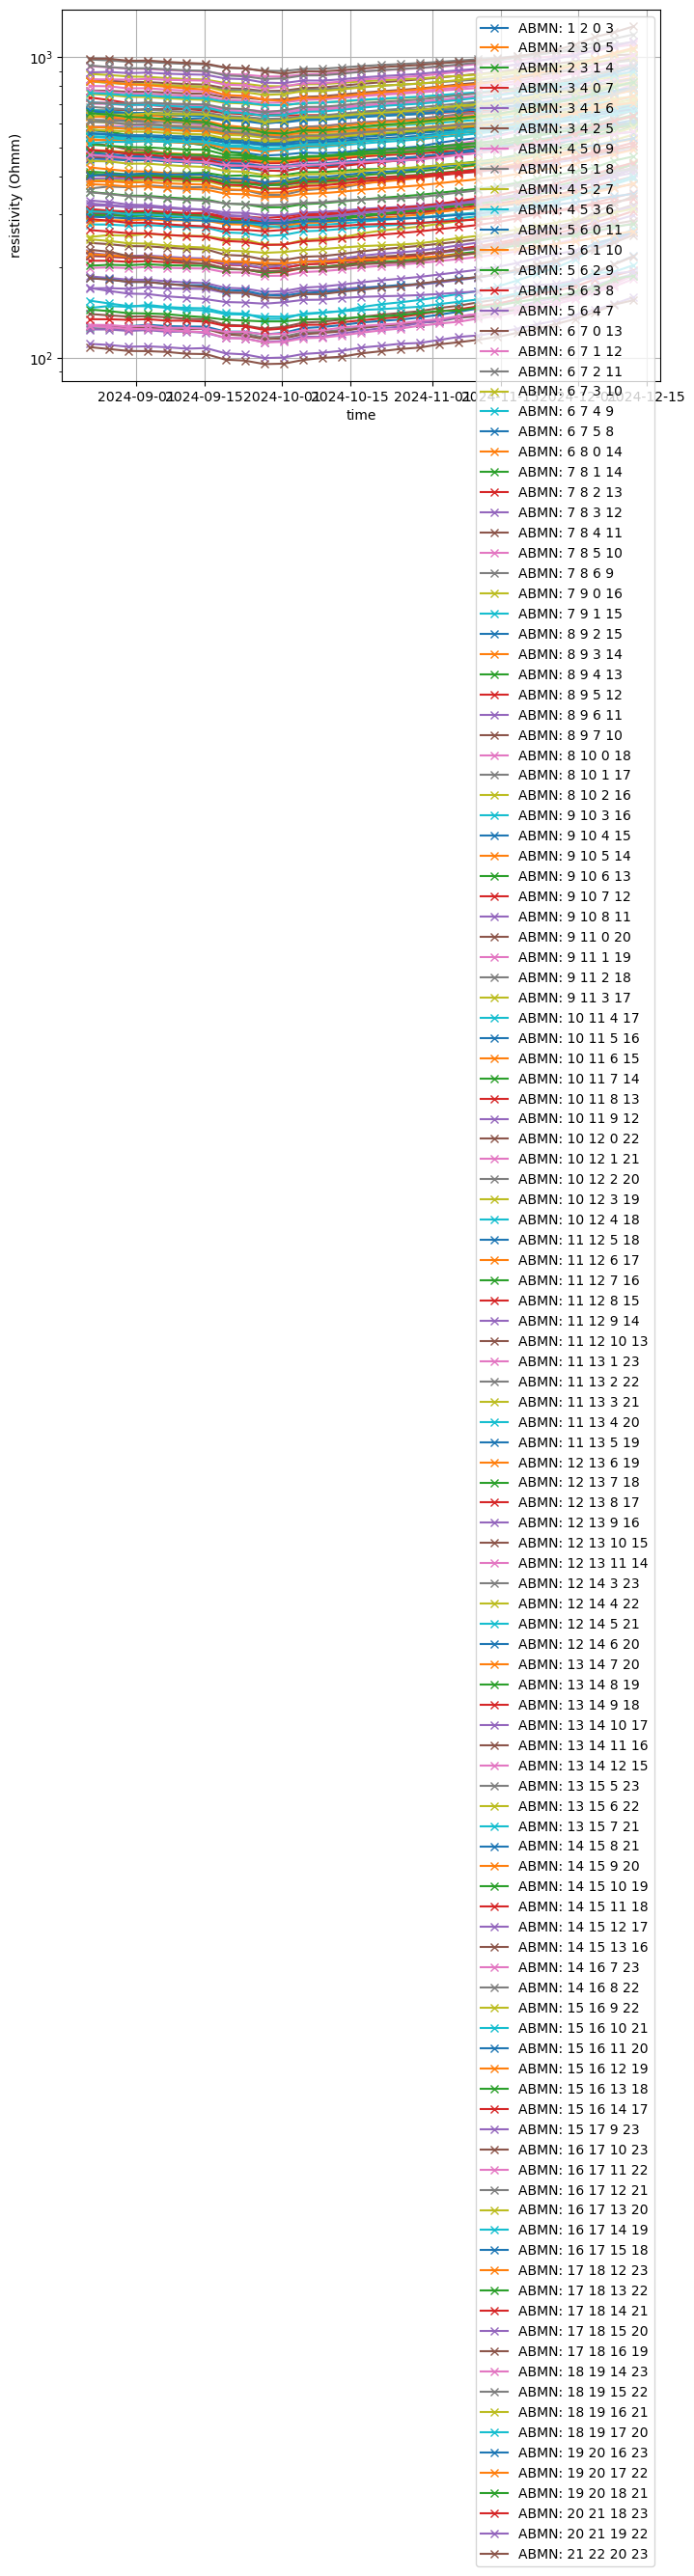

In [21]:
tl.showTimeline()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x28f2f714790>)

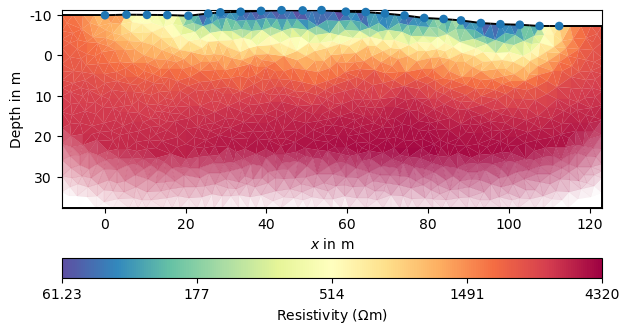

In [47]:
tl.mgr.showResult(tl.models[0])

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x28f313c4350>)

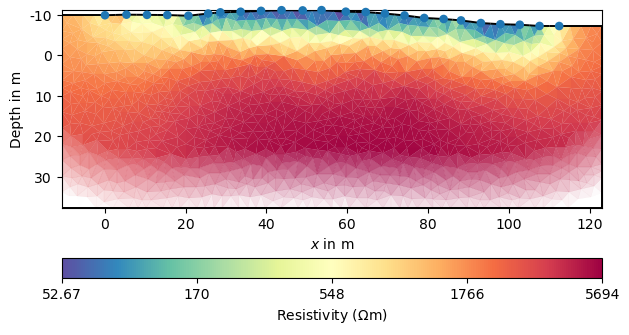

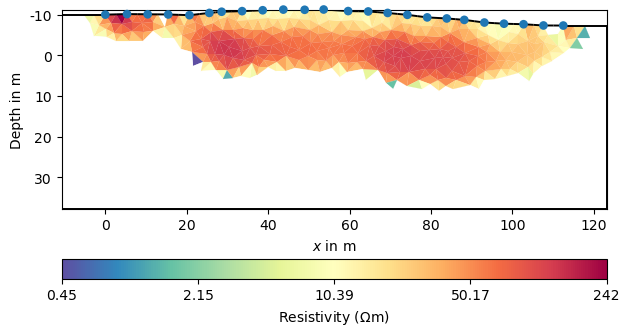

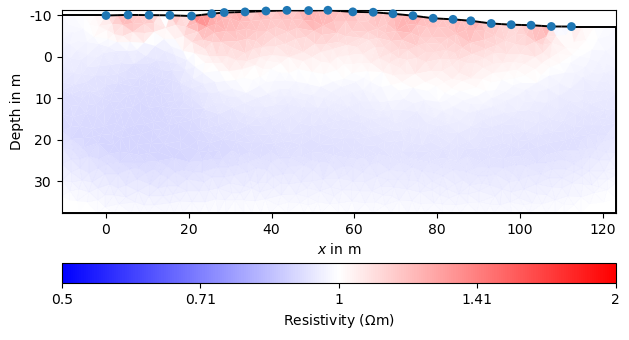

In [48]:
cell_average = tl.models.mean(axis=0)
geom = tl.models[25] - tl.models.mean()
tl.mgr.showResult(cell_average)
tl.mgr.showResult(tl.models[25]-cell_average) 
tl.mgr.showResult(tl.models[25]/cell_average, cMap='bwr', cMin=0.5, cMax=2) 

In [49]:
from matplotlib.backends.backend_pdf import PdfPages

cell_average = tl.models.mean(axis=0)
all_diffs = [tl.models[i] - cell_average for i in range(len(tl.models))]
vmax = np.nanmax([np.abs(diff).max() for diff in all_diffs])
vmin = np.nanmin([np.abs(diff).min() for diff in all_diffs])

with PdfPages(dir+'timelapse_diff_vs_cellaverage_abs.pdf') as pdf:
    for i in range(len(tl.models)):
        fig, ax = plt.subplots(figsize=(8, 4))
        diff = tl.models[i] - cell_average
        tl.mgr.showResult(diff, ax=ax, cMin=vmin, cMax=vmax)
        ax.set_title(f"{timeposs[i]} - cellAverage", fontsize=10)
        fig.tight_layout()
        fig.canvas.draw()
        pdf.savefig(fig)
        plt.close(fig)

In [50]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages(dir+'timelapse_diff_vs_cellaverage_rel.pdf') as pdf:
    for i in range(len(tl.models)):
        fig, ax = plt.subplots(figsize=(8, 4))
        tl.mgr.showResult(tl.models[i]/cell_average, ax=ax, cMap='bwr', cMin=0.5, cMax=2)
        ax.set_title(f"{timeposs[i]} / cellAverage", fontsize=10)
        fig.tight_layout()
        fig.canvas.draw()
        pdf.savefig(fig)
        plt.close(fig)